## Data Analysis of Resturant Business

#### Introduction
In this project, market data analysis of resturant business of LA region will be done. The data on this project is collected from open sources. A business team is going to start a new resturant in this area. Through this analysis we are going to find what types of resturant needs to be started in LA region.
On this project we will answer some questions which are required to make conclusion on what types of restaurant is needed to be build in this region.

### Data Collection and General Information

In [2]:
# importing librabries
import pandas as pd
import numpy as np
import math
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# importing data
try:
    rest_data=pd.read_csv("/datasets/rest_data_us.csv")
except:
    rest_data=pd.read_csv("rest_data_us.csv")

In [4]:
# Sample data
rest_data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [5]:
# info about the data
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


##### Column description

column names and its description
<br>

object_name:   establishment name
<br>

chain: chain establishment (TRUE/FALSE)
<br>

object_type: establishment type
<br>

address: address
<br>

number: number of seats

In [6]:
# checking missing data
display(rest_data.isnull().sum())

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

In [7]:
# checking duplicate data
display(rest_data.duplicated().sum())

0

The resturant data has 3 missing data in chain column.
<br>

No duplicate data in this dataset.

### Data Preprocessing

In [8]:
# Removing missing data
rest_data=rest_data.dropna(axis=0)

In [9]:
# testing for removal of data
rest_data.isnull().sum()

id             0
object_name    0
address        0
chain          0
object_type    0
number         0
dtype: int64

In [10]:
# renaming column names
rest_data=rest_data.rename(columns={"object_name":"resturant_name","object_type":"resturant_type","number":"num_of_seats"})

In [11]:
# capitalize resturant_name
# change resturant type to lower case
rest_data["resturant_name"]=rest_data["resturant_name"].str.title()
rest_data["resturant_type"]=rest_data["resturant_type"].str.lower()
rest_data["address"]=rest_data["address"].str.upper()

In [12]:
# changing data type
rest_data["id"]=rest_data["id"].astype(object)
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              9648 non-null   object
 1   resturant_name  9648 non-null   object
 2   address         9648 non-null   object
 3   chain           9648 non-null   object
 4   resturant_type  9648 non-null   object
 5   num_of_seats    9648 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 527.6+ KB


In [13]:
rest_data.head(5)

,id,resturant_name,address,chain,resturant_type,num_of_seats
0,11786,Habitat Coffee Shop,3708 N EAGLE ROCK BLVD,False,cafe,26
1,11787,Reilly'S,100 WORLD WAY # 120,False,restaurant,9
2,11788,Street Churros,6801 HOLLYWOOD BLVD # 253,False,fast food,20
3,11789,Triniti Echo Park,1814 W SUNSET BLVD,False,restaurant,22
4,11790,Pollen,2100 ECHO PARK AVE,False,restaurant,20


Missing values are removed.
<br>
Meaningful column names are used.
<br>
Values in resturant name column are changed to title case.
<br>
values in resturant name column are changed to lower case.

In [14]:
# removing apt number, unit number, suit number and get building number and street address
# get all addresses
# make a list of empty named cleaned_address
# make list of street ending name
# end each address at item of street endin name list and append it to cleaned address

addresses = rest_data.address.values
cleaned_addresses =[]
street_end_name_list = ['WAY','RD','AVE','BLVD','ST','HWY','BROADWAY','PLZ','AVENUE','DR','PKWY','PARK','PL','CT']
count=0
for address in addresses:
    split_address = address.split()
    flag =0
    for index,address_part in enumerate(split_address):
        for street_end_name in street_end_name_list:
            if street_end_name==address_part:
                cleaned_addresses.append(' '.join(split_address[:index+1]))
                flag =1
        if flag ==1:
            break   
    if flag==0:
        cleaned_addresses.append(address)

addresses = cleaned_addresses 


In [15]:
# addresses = rest_data.address.values
# cleaned_addresses =[]
# for address in addresses:
#     split_address = address.split()
#     last_word = split_address[-1]
#     if last_word.isnumeric():
#         cleaned_addresses.append(' '.join(split_address[:-1]))
#     else:
#         cleaned_addresses.append(' '.join(split_address))
# addresses = cleaned_addresses 
# addresses
# cleaned_addresses =[]
# for address in addresses:
#     split_address = address.split()
#     last_word = split_address[-1]
#     if last_word=='STE' or  last_word=='UNIT':
#         cleaned_addresses.append(' '.join(split_address[:-1]))
#     else:
#         cleaned_addresses.append(' '.join(split_address))
# addresses = cleaned_addresses 
# addresses

In [16]:
# assigned cleaned_addresses to column street_address
rest_data["address"]=cleaned_addresses

In [17]:
rest_data.head(10)

,id,resturant_name,address,chain,resturant_type,num_of_seats
0,11786,Habitat Coffee Shop,3708 N EAGLE ROCK BLVD,False,cafe,26
1,11787,Reilly'S,100 WORLD WAY,False,restaurant,9
2,11788,Street Churros,6801 HOLLYWOOD BLVD,False,fast food,20
3,11789,Triniti Echo Park,1814 W SUNSET BLVD,False,restaurant,22
4,11790,Pollen,2100 ECHO PARK,False,restaurant,20
5,11791,The Spot Grill,10004 NATIONAL BLVD,False,restaurant,14
6,11792,Cpk,100 WORLD WAY,False,restaurant,100
7,11793,Pho Lala,3500 W 6TH ST,False,restaurant,7
8,11794,Abc Donuts,3027 N SAN FERNANDO RD,True,fast food,1
9,11795,Upstairs,3707 N CAHUENGA BLVD,False,restaurant,35


In [18]:
# address is splitted to building number and street address
rest_data[["building_number","street_address"]]=rest_data["address"].str.split(" ",n=1,expand=True)
rest_data.head(5)

,id,resturant_name,address,chain,resturant_type,num_of_seats,building_number,street_address
0,11786,Habitat Coffee Shop,3708 N EAGLE ROCK BLVD,False,cafe,26,3708,N EAGLE ROCK BLVD
1,11787,Reilly'S,100 WORLD WAY,False,restaurant,9,100,WORLD WAY
2,11788,Street Churros,6801 HOLLYWOOD BLVD,False,fast food,20,6801,HOLLYWOOD BLVD
3,11789,Triniti Echo Park,1814 W SUNSET BLVD,False,restaurant,22,1814,W SUNSET BLVD
4,11790,Pollen,2100 ECHO PARK,False,restaurant,20,2100,ECHO PARK


In [19]:
# unique number of street address
print("number of number of unique street address")
rest_data["street_address"].nunique()

number of number of unique street address


804

Address is splitted to street address and building number

### Analyzing Resturant Data

In [20]:
# types of resturant
display(rest_data["resturant_type"].unique())

array(['cafe', 'restaurant', 'fast food', 'bakery', 'bar', 'pizza'],
      dtype=object)

In [21]:
# count of types of resturant
print("Number of type of resturants:")
rest_data["resturant_type"].value_counts()

Number of type of resturants:


restaurant    7253
fast food     1066
cafe           435
pizza          319
bar            292
bakery         283
Name: resturant_type, dtype: int64

In [22]:
# percent of resturant type
print("Percentage of types fo resturant:")
rest_data["resturant_type"].value_counts(normalize=True)*100

Percentage of types fo resturant:


restaurant    75.176202
fast food     11.048922
cafe           4.508706
pizza          3.306385
bar            3.026534
bakery         2.933250
Name: resturant_type, dtype: float64

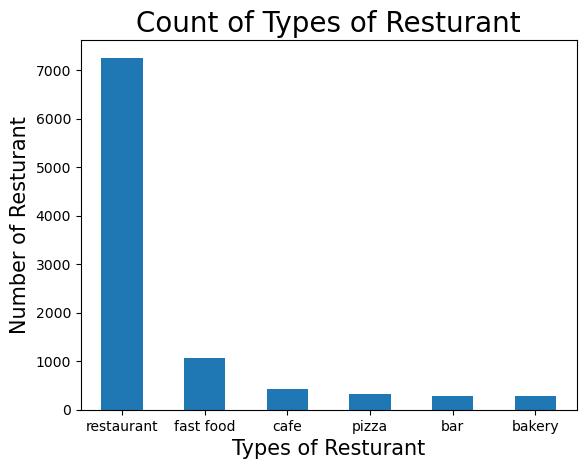

In [23]:
# chart of types of resturant
rest_data['resturant_type'].value_counts(ascending=False).plot(kind='bar',rot=0)
plt.title("Count of Types of Resturant",fontsize=20)
plt.xlabel("Types of Resturant",fontsize=15)
plt.ylabel("Number of Resturant",fontsize=15)
plt.show()

Resturant type of establishment is the leading type of resturant followed by fast food type.
<br>
The count of bakery, bar, pizza, and cafe combines to give 11 percent of overall resturant types. 

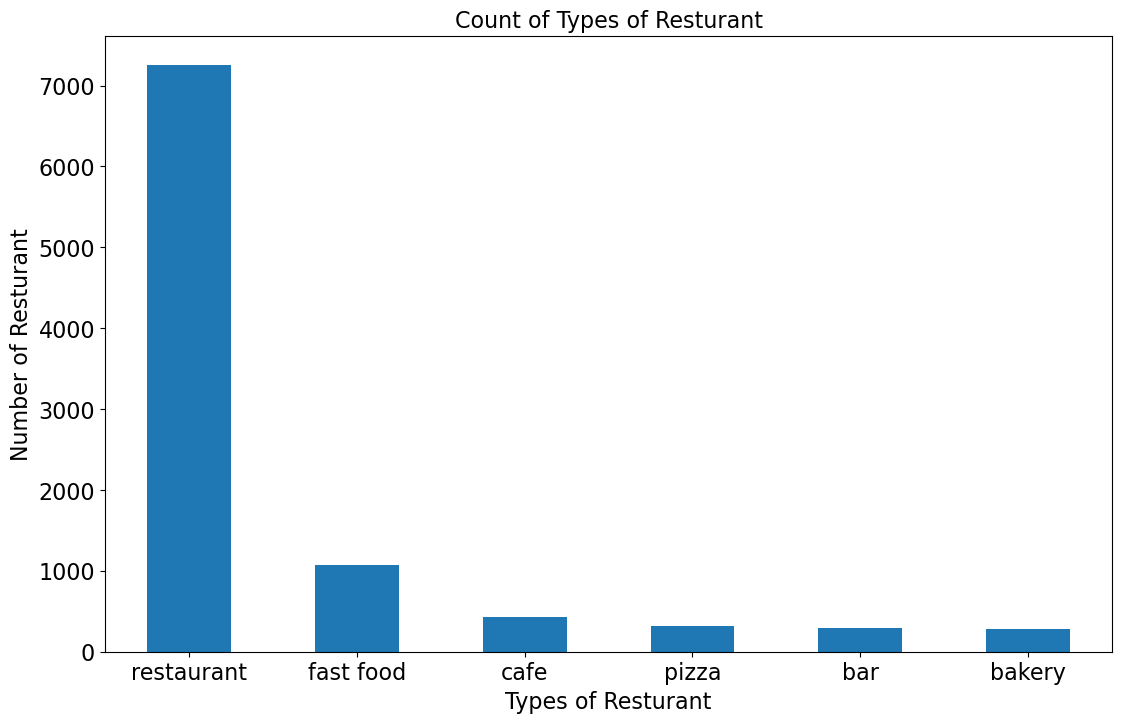

In [24]:
# Reviewer's code
rest_data['resturant_type'].value_counts(ascending=False).plot(kind='bar', rot=0, figsize=(13, 8), fontsize=16)
plt.title("Count of Types of Resturant", fontsize=16)
plt.xlabel("Types of Resturant", fontsize=16)
plt.ylabel("Number of Resturant", fontsize=16)
plt.show()

In [25]:
# changing True or False to chain and non-chain
rest_data["chain"] = np.where(rest_data["chain"] == True, "chain", "non-chain")

In [26]:
# counting number of chain and non-chaing resturant
display(rest_data["chain"].value_counts())

non-chain    5972
chain        3676
Name: chain, dtype: int64

In [27]:
# percentage of chain and non-chaing resturant
display(rest_data["chain"].value_counts(normalize=True)*100)

non-chain    61.898839
chain        38.101161
Name: chain, dtype: float64

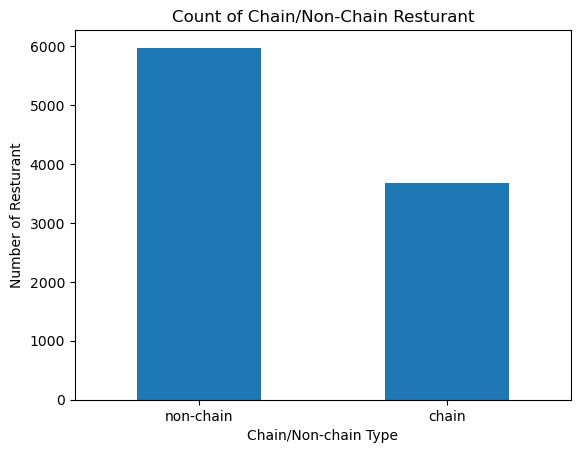

In [28]:
# plotting chaing type resturant
rest_data['chain'].value_counts(ascending=False).plot(kind='bar',rot=0)
plt.title("Count of Chain/Non-Chain Resturant")
plt.xlabel("Chain/Non-chain Type")
plt.ylabel("Number of Resturant")
plt.show()

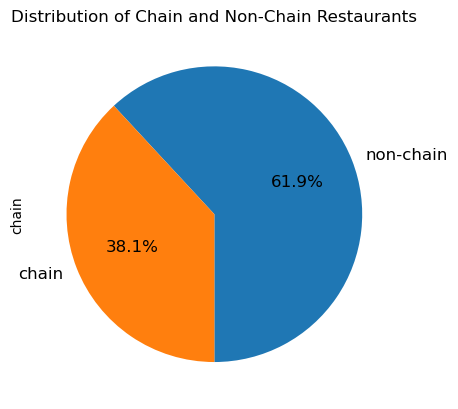

In [29]:
# distribution of chain and non-chain
chain_count=rest_data["chain"].value_counts()
ax=chain_count.plot(kind="pie",autopct='%1.1f%%', startangle=270, fontsize=12)
ax.set_title("Distribution of Chain and Non-Chain Restaurants")
plt.show()

It shows that number of non-chain type resturant is 22 percent higher than the chain type resturant.

##### Which type of establishment is typically a chain?

In [29]:
# pivot table of chain and types of establishment 
pivot_chain_non_chain_pivot=pd.pivot_table(rest_data,values="id",index="chain",columns="resturant_type",aggfunc="count")
pivot_chain_non_chain_pivot

resturant_type,bakery,bar,cafe,fast food,pizza,restaurant
chain,,,,,,
chain,283.0,77.0,266.0,605.0,153.0,2292.0
non-chain,NaN,215.0,169.0,461.0,166.0,4961.0


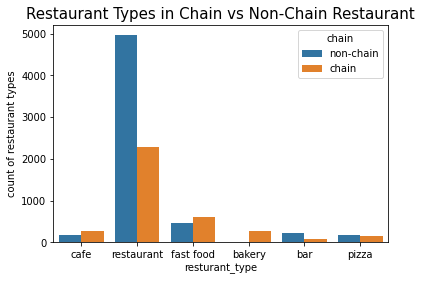

In [30]:
sns.countplot(x='resturant_type',hue='chain',data=rest_data)
plt.title("Restaurant Types in Chain vs Non-Chain Restaurant",fontsize=15)
plt.ylabel("count of restaurant types")
plt.show()

In [31]:
# getting percentage of resturant types in chain type of establishment
# resturant of chain type
rest_data_chain=rest_data[rest_data["chain"]=="chain"].copy()
print("Percentage of resturant types in chain type establishment:")
np.round(rest_data_chain["resturant_type"].value_counts(normalize=True)*100,2)

Percentage of resturant types in chain type establishment:


restaurant    62.35
fast food     16.46
bakery         7.70
cafe           7.24
pizza          4.16
bar            2.09
Name: resturant_type, dtype: float64

In chaing type of establishement the highest percent of resturant types are of resturant covering 62 percent, followed by 
fast food covering 16 percent. Bar type of establishment has the lowest number of chain resturant.

##### What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?

In [32]:
# non-chain data frame
rest_data_non_chain=rest_data[rest_data["chain"]=="non-chain"].copy()

In [33]:
# removing branch numbers from the establishment's name
rest_data_chain['resturant_name'] =rest_data_chain.resturant_name.str.split('#',expand=True)[0]

In [34]:
# Average number of establiments for each chain resturant
print("Average number of resturant for each non-chain resturant")
np.round(rest_data_chain.groupby("resturant_name")["id"].count().mean(),2)

Average number of resturant for each non-chain resturant


1.7

In [35]:
# Average number of seats in chain establishments
print("Average number of seats in chain resturant",np.round(rest_data_chain['num_of_seats'].mean(),2))

Average number of seats in chain resturant 39.69


In [36]:
# average number of resturant for each non-chain resturant
print("Average number of resturant for each non-chain resturant")
np.round(rest_data_non_chain.groupby("resturant_name")["id"].count().sort_values(ascending=False).mean(),2)

Average number of resturant for each non-chain resturant


1.0

In [37]:
# average number of seats in non-chain resturant
print("Average number of seats in non-chain resturant")
np.round(rest_data_non_chain['num_of_seats'].mean(),2)

Average number of seats in non-chain resturant


46.17

In [38]:
# Top 25 non-chain establishement name and resturant type and their number of seats 
rest_data_non_chain.sort_values(by="num_of_seats",ascending=False).head(25)

,id,resturant_name,address,chain,resturant_type,num_of_seats,building_number,street_address
4854,16640,Wokcano Downtown L.A.,800 W 7TH ST,non-chain,restaurant,229,800,W 7TH ST
4626,16412,Playhouse,6506 HOLLYWOOD BLVD,non-chain,restaurant,229,6506,HOLLYWOOD BLVD
3495,15281,Usc University Club,705 W 34TH ST,non-chain,restaurant,229,705,W 34TH ST
3277,15063,American Jewish University,15600 MULHOOLAND DR,non-chain,restaurant,229,15600,MULHOOLAND DR
5091,16877,Boulevard 3,6523 W SUNSET BLVD,non-chain,restaurant,229,6523,W SUNSET BLVD
8699,20485,Vibiana,210 S MAIN ST,non-chain,restaurant,229,210,S MAIN ST
1621,13407,Crowne Plaza Lax Landing,5985 W CENTURY BLVD,non-chain,restaurant,228,5985,W CENTURY BLVD
3332,15118,X Bound,3470 WILSHIRE BLVD,non-chain,restaurant,228,3470,WILSHIRE BLVD
8892,20678,Lowboy,1536 W SUNSET BLVD,non-chain,restaurant,228,1536,W SUNSET BLVD
8709,20495,Rejuvenate Cafe,4733 W SUNSET BLVD,non-chain,restaurant,228,4733,W SUNSET BLVD


In [39]:
#  Top 25 number of seats in chain resturant
rest_data_chain.sort_values(by="num_of_seats",ascending=False).head(25)

,id,resturant_name,address,chain,resturant_type,num_of_seats,building_number,street_address
594,12380,Kabuki Japanese Restaurant,1545 N VINE ST,chain,restaurant,229,1545,N VINE ST
475,12261,Mountaingate Country Club,12445 MOUNTAIN GATE DR,chain,restaurant,229,12445,MOUNTAIN GATE DR
7383,19169,Manna Korean Bbq,3986 WILSHIRE BLVD,chain,restaurant,229,3986,WILSHIRE BLVD
5478,17264,Chuck E Cheese'S,2706 WILSHIRE BLVD,chain,restaurant,228,2706,WILSHIRE BLVD
457,12243,Usc Main Kitchen-Basement,3607 TROUSDALE PKWY,chain,restaurant,227,3607,TROUSDALE PKWY
1889,13675,Mcdonald'S,341 S VERMONT AVE,chain,fast food,227,341,S VERMONT AVE
1064,12850,Chosun Galbee Restaurant,3330 W OLYMPIC BLVD,chain,restaurant,226,3330,W OLYMPIC BLVD
1612,13398,California Club-Main Kitchen,538 S FLOWER ST,chain,restaurant,225,538,S FLOWER ST
1928,13714,La Fonda Restaurant,2501 WILSHIRE BLVD,chain,restaurant,225,2501,WILSHIRE BLVD
122,11908,Trastevere Restaurant,6801 HOLLYWOOD BLVD,chain,restaurant,224,6801,HOLLYWOOD BLVD


Both chain and non-chain resturants have higher number of seats in resturant type establishment.

It shows each chain resturant have an average of 1.7 branches. Average number of seats in chain resturant is close 40 whereas average number of seats in non-chain resturant is 46.
<br>
Thus chain resturants are higher in number and it has less number of seats.

In [40]:
# average number of seats by resturant types
print("Average number of seats by resturant types")
np.round(rest_data.groupby("resturant_type")["num_of_seats"].mean(),2)

Average number of seats by resturant types


resturant_type
bakery        21.77
bar           44.77
cafe          25.00
fast food     31.84
pizza         28.55
restaurant    48.05
Name: num_of_seats, dtype: float64

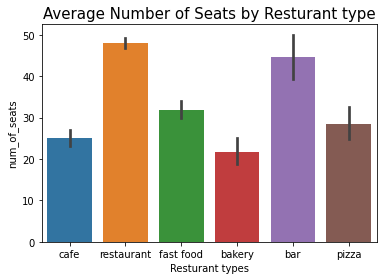

In [41]:
# plotting average number of seats by resturant type
sns.barplot(x="resturant_type", y="num_of_seats", data=rest_data)
plt.title("Average Number of Seats by Resturant type",fontsize=15)
plt.xlabel("Resturant types")
plt.show()

Resturant types of establishments have the highest number of seats, 48 seats, followed by bar with about 45 seats, and fast food with
about 32 seats.

In [42]:
# top ten streets by number of restaurants.
top_street_rest_data=pd.pivot_table(rest_data,values="id",index="street_address",aggfunc="count").sort_values(by="id",ascending=False).head(10)
top_street_rest_data

,id
street_address,
WILSHIRE BLVD,381
W SUNSET BLVD,361
W PICO BLVD,341
S WESTERN AVE,271
SANTA MONICA BLVD,262
HOLLYWOOD BLVD,242
W OLYMPIC BLVD,231
S FIGUEROA ST,227
W 3RD ST,225


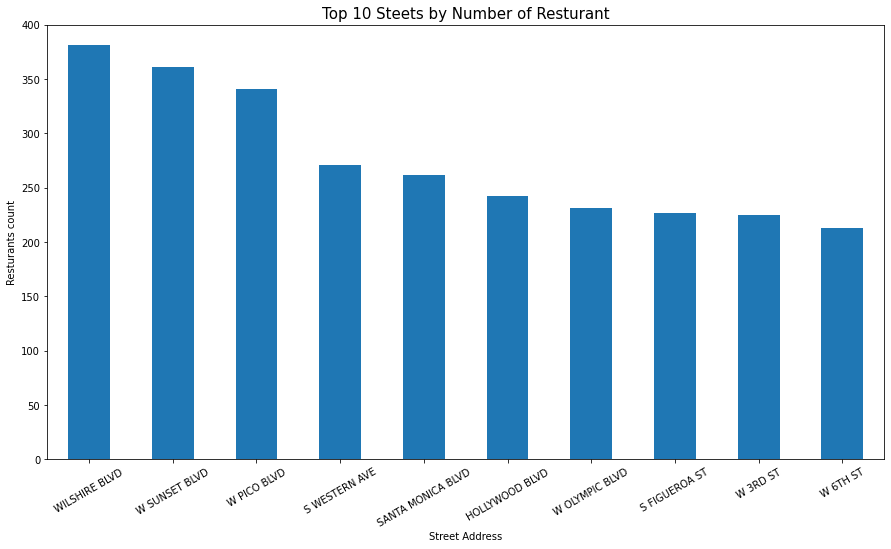

In [43]:
top_10_street=rest_data["street_address"].value_counts(ascending=False).head(10)
#sns.barplot(top_10_street)
#plt.figure(figsize=(15,8))
top_10_street.plot.bar(rot=30, figsize=(15, 8))
plt.title("Top 10 Steets by Number of Resturant",fontsize=15)
plt.xlabel("Street Address")
plt.ylabel("Resturants count")
plt.show()

The highest number of restaurants that a street can have is 381 returants, followed by 361 resturants.

In [44]:
# counting street that have one restaurant
print("Number of street that have only one restaurant:",rest_data["street_address"].value_counts().loc[lambda x: x==1].count())

Number of street that have only one restaurant: 362


In [45]:
rest_data["street_address"].value_counts().loc[lambda x: x==1]

SHATTO PL              1
S BROXTON AVE          1
E 1ST BLVD             1
S MC CLINTOCK AVE      1
W 62ND ST              1
                      ..
E POMONA BLVD          1
TOPANGA CANYON BLVD    1
PRODUCE ROW            1
ALBANY ST              1
E JAPANESE VLG PLZ     1
Name: street_address, Length: 362, dtype: int64

In [46]:
# proportion of street that have only one resturant
print("proportion of street that have only one restaurant:",np.round(rest_data["street_address"].value_counts().loc[lambda x: x==1].count()/rest_data["street_address"].value_counts().count(),2))

proportion of street that have only one restaurant: 0.45


There are 362 streets that have only one resturant. 45 percent of the street have only one resturant

In [47]:
rest_data[rest_data["street_address"]=="W sunset BLVD"]

,id,resturant_name,address,chain,resturant_type,num_of_seats,building_number,street_address


In [48]:
# Reviewer's code
'W sunset BLVD' in list(rest_data["street_address"].value_counts().loc[lambda x: x==1].index)

False

In [49]:
# streets with a lot of restaurants and their mean number of seats
top_street=rest_data.groupby('street_address').agg({'id':'count','num_of_seats': np.mean})
top_street.tail(50)
top_street.sort_values(by="id",ascending=False).head(25)

,id,num_of_seats
street_address,,
WILSHIRE BLVD,381,52.540682
W SUNSET BLVD,361,48.700831
W PICO BLVD,341,39.460411
S WESTERN AVE,271,41.339483
SANTA MONICA BLVD,262,34.977099
HOLLYWOOD BLVD,242,56.644628
W OLYMPIC BLVD,231,51.203463
S FIGUEROA ST,227,49.127753
W 3RD ST,225,39.368889


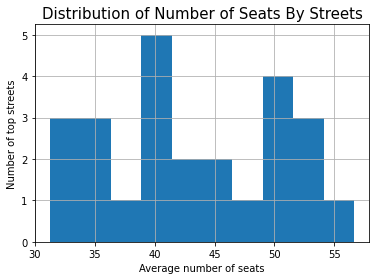

In [50]:
# distribution of average number of seats in top streets
top_street.sort_values(by="id",ascending=False).head(25)["num_of_seats"].hist()
plt.title("Distribution of Number of Seats By Streets",fontsize=15)
plt.xlabel("Average number of seats")
plt.ylabel("Number of top streets")
plt.show()

The streets that have a lot of resturants tends to have high number of seats.

#### Conclusion

After completing this data analysis, it is recommened to open restaurant or bar on one of the street that have only 
resturant. It is reasonable to open restaurant or bar types of establishment with seats higher than 35 seats.
<br>
It is recommended to open non-chain restaurant than to open chain restaurant.

Presentation: <https://drive.google.com/file/d/1qulcS4S1kACK_Pu4RdL24Mo62-BUGhfz/view?usp=sharing>